### Курсовой проект "Предсказание цен на недвижимость"

### Предобработка данных

**Подключение библиотек**

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Пути к файлам**

In [2]:
DATASET_PATH = 'train.csv'
PREPARED_DATASET_PATH = 'train_prepared.csv'
TEST_DATASET_PATH = 'test.csv'

**Загрузка данных**

In [3]:
df = pd.read_csv(DATASET_PATH)
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


**Форма массива**

In [4]:
df.shape

(10000, 20)

**Общая информация о массиве**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


**Cтатистические характеристики по столбцам с числовыми значениями**

In [6]:
round(df.describe(),1)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.0,10000.0,10000.0,10000.0,7887.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,5202.0,10000.0,10000.0,10000.0
mean,8383.4,50.4,1.9,56.3,37.2,6.3,8.5,12.6,3990.2,0.1,24.7,5352.2,8.0,1142.9,1.3,4.2,214138.9
std,4859.0,43.6,0.8,21.1,86.2,28.6,5.2,6.8,200500.3,0.1,17.5,4006.8,23.8,1021.5,1.5,4.8,92872.3
min,0.0,0.0,0.0,1.1,0.4,0.0,1.0,0.0,1910.0,0.0,0.0,168.0,0.0,0.0,0.0,0.0,59174.8
25%,4169.5,20.0,1.0,41.8,22.8,1.0,4.0,9.0,1974.0,0.0,6.0,1564.0,0.0,350.0,0.0,1.0,153872.6
50%,8394.5,36.0,2.0,52.5,32.8,6.0,7.0,13.0,1977.0,0.1,25.0,5285.0,2.0,900.0,1.0,3.0,192269.6
75%,12592.5,75.0,2.0,65.9,45.1,9.0,12.0,17.0,2001.0,0.2,36.0,7227.0,5.0,1548.0,2.0,6.0,249135.5
max,16798.0,209.0,19.0,641.1,7480.6,2014.0,42.0,117.0,20052011.0,0.5,74.0,19083.0,141.0,4849.0,6.0,23.0,633233.5


**Информация по категориальным признакам**

In [7]:
df.describe(include=[object])

,Ecology_2,Ecology_3,Shops_2
count,10000,10000,10000
unique,2,2,2
top,B,B,B
freq,9903,9725,9175


**Информация о значениях категориальных признаков**

In [8]:
df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [9]:
df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [10]:
df['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

**Barplot по признаку Ecology_2**

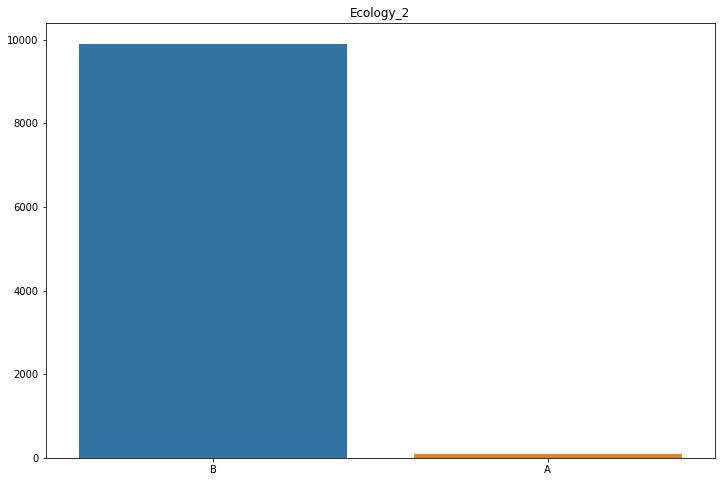

In [11]:
counts = df['Ecology_2'].value_counts()
    
plt.figure(figsize=(12,8))    
plt.title('Ecology_2')
sns.barplot(counts.index, counts.values)
    
plt.show()

**Преобразование категориальных признаков в бинарные**

In [12]:
def to_dummies(df):
    df = pd.get_dummies(df)
    return df
df = to_dummies(df)

In [13]:
pd.options.display.max_columns = 100

In [14]:
df.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,33,7976,5,NaN,0,11,184966.930730,0,1,0,1,0,1
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,46,10309,1,240.0,1,16,300009.450063,0,1,0,1,0,1
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,34,7759,0,229.0,1,3,220925.908524,0,1,0,1,0,1
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,23,5735,3,1084.0,0,5,175616.227217,0,1,0,1,0,1
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,35,5776,1,2078.0,2,4,150226.531644,0,1,0,1,0,1
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,35,7715,4,990.0,0,6,215898.447742,0,1,0,1,0,1
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,20,4386,14,NaN,1,5,296021.204377,0,1,0,1,0,1
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,6,1437,3,NaN,0,2,221244.156664,0,1,0,1,0,1
8,5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,0.007122,1,264,0,NaN,0,1,229102.795999,0,1,0,1,0,1
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,6,1437,3,NaN,0,2,95380.220993,0,1,0,1,0,1


**Удаление бинарного признака Ecology_2** 

In [15]:
df.drop(['Ecology_2_A','Ecology_2_B'], axis=1, inplace=True)

**Количество пропущенных значений по каждому признаку**

In [16]:
len(df) - df.count()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Price               0
Ecology_3_A         0
Ecology_3_B         0
Shops_2_A           0
Shops_2_B           0
dtype: int64

**Анализ целевой переменной**


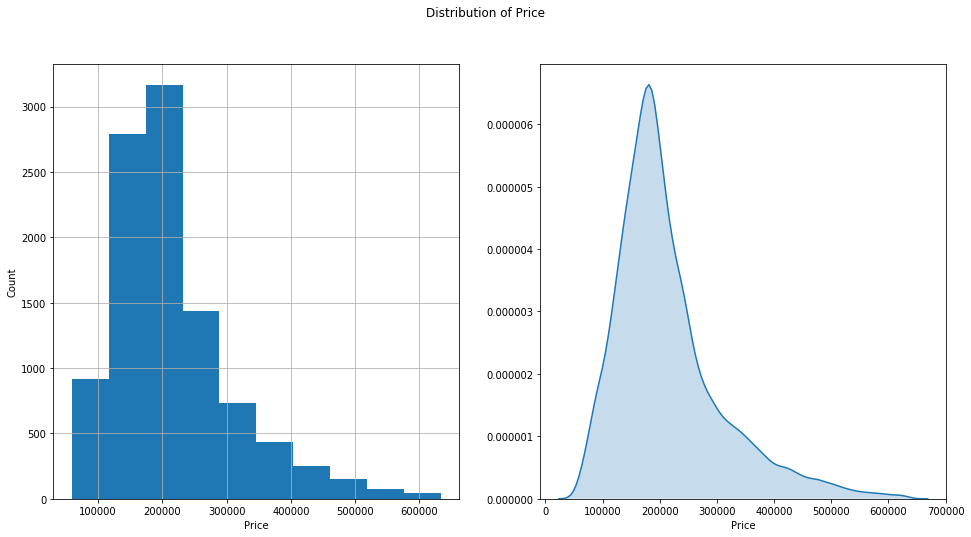

In [17]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
df['Price'].hist()
plt.ylabel('Count')
plt.xlabel('Price')

plt.subplot(122)
sns.kdeplot(df['Price'], shade=True, legend=False)
plt.xlabel('Price')

plt.suptitle('Distribution of Price')
plt.show()

**Получение среднего значения, медианы и моды целевой переменной**

In [18]:
target_mean = round(df['Price'].mean(), 2)
target_median = df['Price'].median()
target_mode = df['Price'].mode()[0]

target_mean, target_median, target_mode

(214138.86, 192269.64487934904, 59174.77802758122)

**Распределение целевой переменной с нанесенными средним арифметическим, медианой и модой**

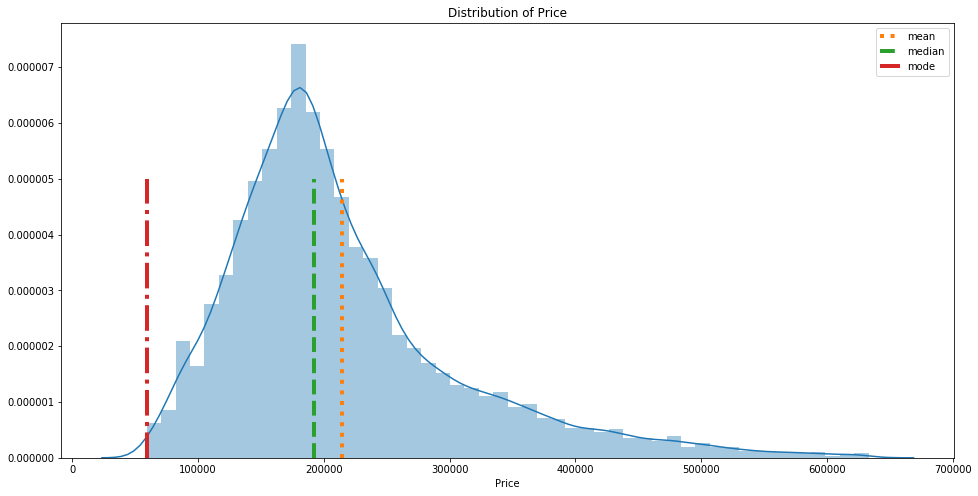

In [19]:
plt.figure(figsize = (16, 8))

sns.distplot(df['Price'])

y = np.linspace(0, 0.000005, 100)

plt.plot([target_mean] * 100, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 100, y, label='median', linestyle='--', linewidth=4)
plt.plot([target_mode] * 100, y, label='mode', linestyle='-.', linewidth=4)

plt.title('Distribution of Price')
plt.legend()
plt.show()

**Анализ количественных признаков**

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Price            10000 non-null float64
Ecology_3_A      10000 non-null uint8
Ecology_3_B      10000 non-null uint8
Shops_2_A        10000 non-null uint8
Shops_2_B        10000 non-null uint8
dtypes: float64(8), int64(9), uint8(4)
memory usage: 1.3 MB


In [21]:
df_num_features = df.select_dtypes(include=['float64', 'int64'])

**Гистограммы количественных признаков**


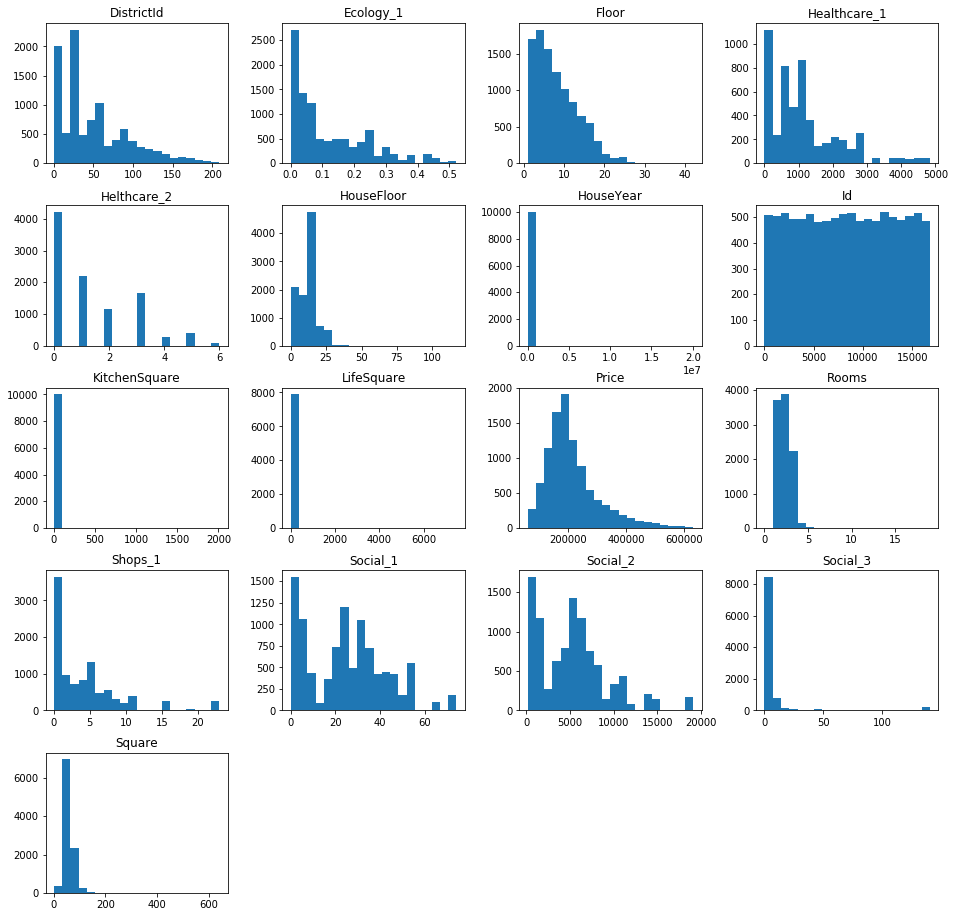

In [22]:
df_num_features.hist(figsize=(16,16), bins=20, grid=False);

**Заполнение пропусков признака Healthcare_1**

In [23]:
df_healthcare_1 = df_num_features.loc[df_num_features['Healthcare_1'] < 100, 'Healthcare_1'].reset_index(drop=True)
df_healthcare_1.head()

0    30.0
1    30.0
2    46.0
3    30.0
4    30.0
Name: Healthcare_1, dtype: float64

**Получение среднего арифметического, медианы, моды части характеристики Healthcare_1**

In [24]:
Healthcare_1_mean = round(df_healthcare_1.mean(), 2)
Healthcare_1_median = df_healthcare_1.median()
Healthcare_1_mode = df_healthcare_1.mode()[0]

Healthcare_1_mean, Healthcare_1_median, Healthcare_1_mode

(37.04, 30.0, 30.0)

**Заполнение пропущенных значений характеристики healthcare_1 медианой части выборки Healthcare_1**


In [25]:
def fill_Healthcare_1(df):
    df.loc[df['Healthcare_1'].isnull(), 'Healthcare_1'] = Healthcare_1_median
    return df
df = fill_Healthcare_1(df)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     10000 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Price            10000 non-null float64
Ecology_3_A      10000 non-null uint8
Ecology_3_B      10000 non-null uint8
Shops_2_A        10000 non-null uint8
Shops_2_B        10000 non-null uint8
dtypes: float64(8), int64(9), uint8(4)
memory usage: 1.3 MB


**Гистограмма признака Lifesquare < 200**

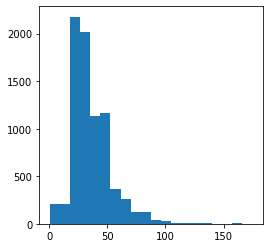

In [27]:
df_num_features.loc[df_num_features['LifeSquare'] < 200, 'LifeSquare'].\
    hist(figsize=(4,4), bins=20, grid=False);

**Гистограмма признака KitchenSquare < 100**

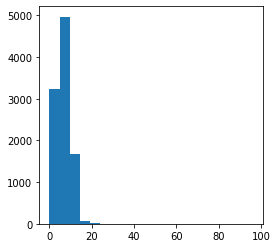

In [28]:
df_num_features.loc[df_num_features['KitchenSquare'] < 100, 'KitchenSquare'].\
    hist(figsize=(4,4), bins=20, grid=False);

**Матрица корреляций**

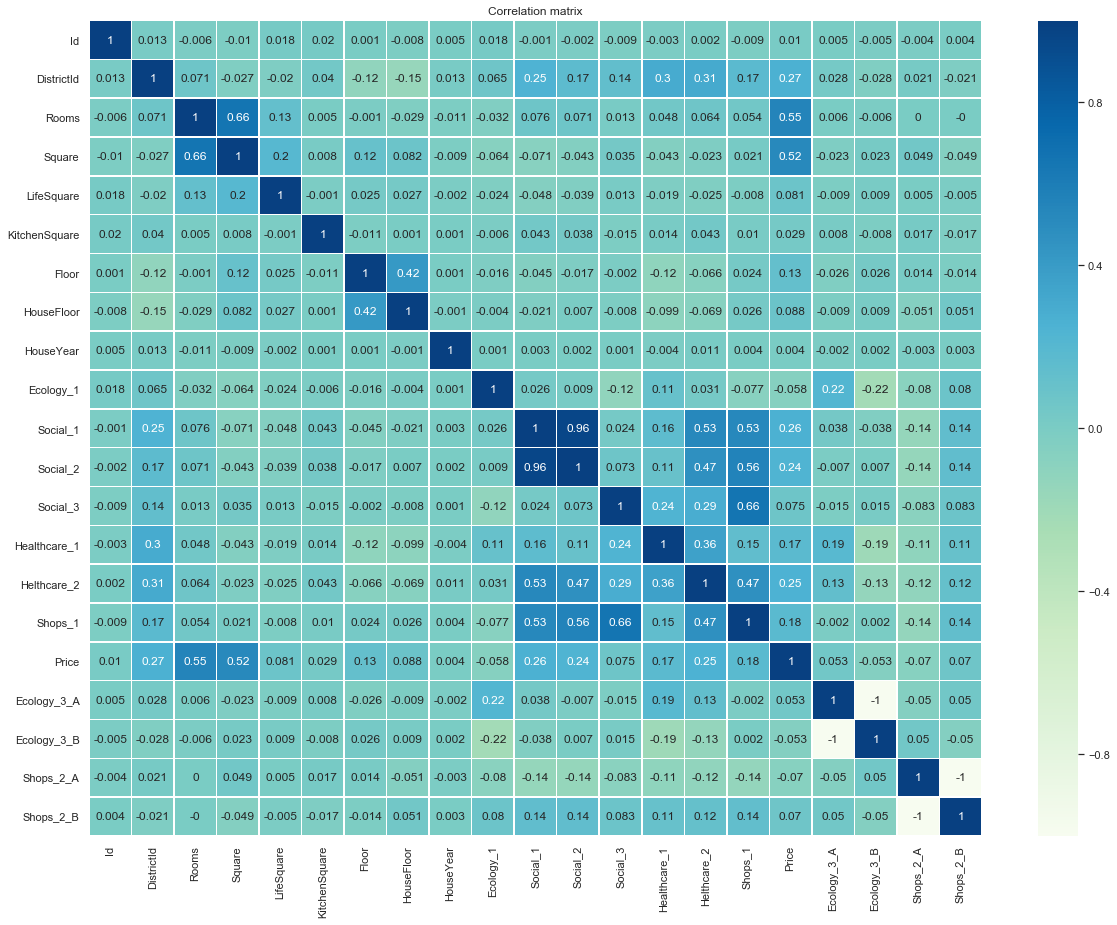

In [29]:
plt.figure(figsize = (20,15))

sns.set(font_scale=1.0)
ax = sns.heatmap(round(df.corr(),3), annot=True, linewidths=.5, cmap='GnBu')
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)
plt.title('Correlation matrix')
plt.show()

**Исследование характеристики Rooms**

**Количество Rooms со значением 0**

In [30]:
df[df['Rooms'] == 0].shape[0]

8

**Замена нулевых значений количества Rooms единицами и замена выбросов**

In [31]:
Rooms_median = df['Rooms'].median()
def fill_Rooms(df):
    df.loc[(df['Rooms'] == 0), 'Rooms'] = 1
    df.loc[df['Rooms'] >= 6, 'Rooms'] = Rooms_median
    return df
df = fill_Rooms(df)

**Количество комнат - количество квартир**

In [32]:
df['Rooms'].value_counts()

2.0    3884
1.0    3713
3.0    2235
4.0     150
5.0      18
Name: Rooms, dtype: int64

**Исследование характеристики KitchenSquare**

**Количество KitchenSquare со значением 0**

In [33]:
df[df['KitchenSquare'] == 0].shape[0]

697

**Количество KitchenSquare со значением 1**

In [34]:
df[df['KitchenSquare'] == 1].shape[0]

2460

**Площадь кухни - количество квартир**

In [35]:
df['KitchenSquare'].value_counts().sort_values()

54.0         1
72.0         1
96.0         1
66.0         1
48.0         1
40.0         1
2014.0       1
35.0         1
60.0         1
78.0         1
27.0         1
84.0         1
42.0         1
62.0         1
39.0         1
1970.0       1
36.0         1
75.0         1
26.0         1
21.0         1
29.0         1
23.0         1
73.0         1
123.0        1
31.0         1
63.0         1
53.0         1
30.0         2
58.0         2
32.0         2
51.0         2
43.0         2
25.0         2
112.0        2
41.0         2
37.0         2
22.0         3
2.0          4
18.0         6
19.0        11
17.0        12
20.0        14
16.0        16
3.0         22
15.0        31
4.0         39
14.0        51
13.0        67
11.0       233
12.0       249
7.0        609
0.0        697
9.0        843
6.0       1038
10.0      1075
5.0       1169
8.0       1306
1.0       2460
Name: KitchenSquare, dtype: int64

**Гистограмма значений >=1, но <20**

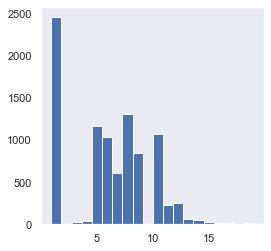

In [36]:
df.loc[(df['KitchenSquare'] >= 1) & (df['KitchenSquare'] < 20), 'KitchenSquare'].\
    hist(figsize=(4,4), bins=20, grid=False);

**Гистограмма значений >20**

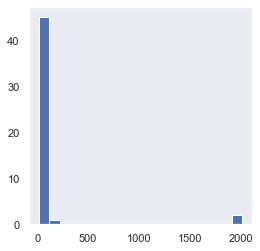

In [37]:
df.loc[df['KitchenSquare'] > 20, 'KitchenSquare'].\
    hist(figsize=(4,4), bins=20, grid=False);

**Замена выброса значений KitchenSquare и значений <3 значением 3**

In [38]:
def fill_KitchenSquare(df):
    df.loc[(df['KitchenSquare'] < 3)|(df['KitchenSquare'] > 500), 'KitchenSquare'] = 3
    return df
df = fill_KitchenSquare(df)

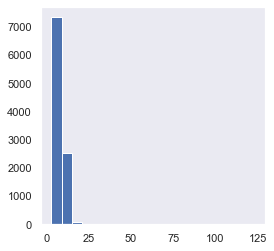

In [39]:
df['KitchenSquare'].hist(figsize=(4,4), bins=20, grid=False);

In [40]:
round(df.describe(),1)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
count,10000.0,10000.0,10000.0,10000.0,7887.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,8383.4,50.4,1.9,56.3,37.2,6.6,8.5,12.6,3990.2,0.1,24.7,5352.2,8.0,608.9,1.3,4.2,214138.9,0.0,1.0,0.1,0.9
std,4859.0,43.6,0.8,21.1,86.2,4.5,5.2,6.8,200500.3,0.1,17.5,4006.8,23.8,923.0,1.5,4.8,92872.3,0.2,0.2,0.3,0.3
min,0.0,0.0,1.0,1.1,0.4,3.0,1.0,0.0,1910.0,0.0,0.0,168.0,0.0,0.0,0.0,0.0,59174.8,0.0,0.0,0.0,0.0
25%,4169.5,20.0,1.0,41.8,22.8,3.0,4.0,9.0,1974.0,0.0,6.0,1564.0,0.0,30.0,0.0,1.0,153872.6,0.0,1.0,0.0,1.0
50%,8394.5,36.0,2.0,52.5,32.8,6.0,7.0,13.0,1977.0,0.1,25.0,5285.0,2.0,30.0,1.0,3.0,192269.6,0.0,1.0,0.0,1.0
75%,12592.5,75.0,2.0,65.9,45.1,9.0,12.0,17.0,2001.0,0.2,36.0,7227.0,5.0,990.0,2.0,6.0,249135.5,0.0,1.0,0.0,1.0
max,16798.0,209.0,5.0,641.1,7480.6,123.0,42.0,117.0,20052011.0,0.5,74.0,19083.0,141.0,4849.0,6.0,23.0,633233.5,1.0,1.0,1.0,1.0


**Исследование характеристики LifeSquare**

Жилая площадь не может быть больше общей площади

In [41]:
df[df['Square'] < df['LifeSquare']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
28,8054,23,1.0,42.530043,43.967759,3.0,3,9.0,2014,0.034656,0,168,0,30.0,0,0,95338.198549,0,1,0,1
44,10521,38,3.0,104.211396,106.340403,3.0,20,0.0,2017,0.060753,15,2787,2,520.0,0,7,435462.048070,0,1,0,1
52,2301,1,2.0,61.400054,65.224603,3.0,17,22.0,2016,0.007122,1,264,0,30.0,0,1,199215.452229,0,1,0,1
123,8753,25,3.0,85.952306,89.803753,3.0,4,3.0,2017,0.069753,53,13670,4,30.0,1,11,309688.592681,0,1,0,1
153,9870,62,1.0,51.831473,53.491301,3.0,5,1.0,2015,0.072158,2,629,1,30.0,0,0,131797.472284,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9884,41,30,2.0,59.015896,59.439082,12.0,5,5.0,2016,0.000078,22,6398,141,1046.0,3,23,126281.142781,0,1,0,1
9889,12918,23,2.0,51.440463,53.134243,51.0,3,17.0,2017,0.005767,1,388,0,30.0,0,0,88150.012510,0,1,0,1
9895,2737,27,3.0,123.430072,125.806981,123.0,5,10.0,2015,0.017647,2,469,0,30.0,0,0,234194.837047,0,1,0,1
9902,14001,73,1.0,44.098768,44.267551,3.0,7,24.0,2014,0.042032,37,6856,84,1940.0,2,5,381937.404161,0,1,0,1


**Заполнение пропущенных значений и нелогичных значений**

In [42]:
def fill_LifeSquare(df):
    df.loc[(df['Square'] < df['LifeSquare']) | (df['LifeSquare'].isna()), 'LifeSquare'] = \
    (df.loc[(df['Square'] < df['LifeSquare']) | (df['LifeSquare'].isna()), 'Square'] - \
    df.loc[(df['Square'] < df['LifeSquare']) | (df['LifeSquare'].isna()), 'KitchenSquare'])*0.7
    return df

df = fill_LifeSquare(df)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       10000 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     10000 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Price            10000 non-null float64
Ecology_3_A      10000 non-null uint8
Ecology_3_B      10000 non-null uint8
Shops_2_A        10000 non-null uint8
Shops_2_B        10000 non-null uint8
dtypes: float64(8), int64(9), uint8(4)
memory usage: 1.3 MB


In [44]:
round(df.describe(),1)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,8383.4,50.4,1.9,56.3,35.8,6.6,8.5,12.6,3990.2,0.1,24.7,5352.2,8.0,608.9,1.3,4.2,214138.9,0.0,1.0,0.1,0.9
std,4859.0,43.6,0.8,21.1,17.5,4.5,5.2,6.8,200500.3,0.1,17.5,4006.8,23.8,923.0,1.5,4.8,92872.3,0.2,0.2,0.3,0.3
min,0.0,0.0,1.0,1.1,-1.3,3.0,1.0,0.0,1910.0,0.0,0.0,168.0,0.0,0.0,0.0,0.0,59174.8,0.0,0.0,0.0,0.0
25%,4169.5,20.0,1.0,41.8,24.0,3.0,4.0,9.0,1974.0,0.0,6.0,1564.0,0.0,30.0,0.0,1.0,153872.6,0.0,1.0,0.0,1.0
50%,8394.5,36.0,2.0,52.5,32.9,6.0,7.0,13.0,1977.0,0.1,25.0,5285.0,2.0,30.0,1.0,3.0,192269.6,0.0,1.0,0.0,1.0
75%,12592.5,75.0,2.0,65.9,44.4,9.0,12.0,17.0,2001.0,0.2,36.0,7227.0,5.0,990.0,2.0,6.0,249135.5,0.0,1.0,0.0,1.0
max,16798.0,209.0,5.0,641.1,638.2,123.0,42.0,117.0,20052011.0,0.5,74.0,19083.0,141.0,4849.0,6.0,23.0,633233.5,1.0,1.0,1.0,1.0


**Исследование характеристики HouseYear**

In [45]:
df[df['HouseYear'] > 2020]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
1497,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,30,6141,10,262.0,3,6,254084.534396,0,1,0,1
4189,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,25,4756,16,2857.0,5,8,243028.603096,0,1,0,1


**Гистограмма HouseYear без выброса**

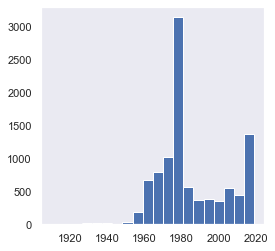

In [46]:
df.loc[df['HouseYear'] < 2020, 'HouseYear'].\
    hist(figsize=(4,4), bins=20, grid=False);

**Замена выбросов значений HouseYear медианой**

In [47]:
HouseYear_median = df['HouseYear'].median()
def fill_HouseYear(df):
    df.loc[df['HouseYear'] > 2020, 'HouseYear'] = HouseYear_median
    return df

df = fill_HouseYear(df)

In [48]:
round(df.describe(),1)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,8383.4,50.4,1.9,56.3,35.8,6.6,8.5,12.6,1984.9,0.1,24.7,5352.2,8.0,608.9,1.3,4.2,214138.9,0.0,1.0,0.1,0.9
std,4859.0,43.6,0.8,21.1,17.5,4.5,5.2,6.8,18.4,0.1,17.5,4006.8,23.8,923.0,1.5,4.8,92872.3,0.2,0.2,0.3,0.3
min,0.0,0.0,1.0,1.1,-1.3,3.0,1.0,0.0,1910.0,0.0,0.0,168.0,0.0,0.0,0.0,0.0,59174.8,0.0,0.0,0.0,0.0
25%,4169.5,20.0,1.0,41.8,24.0,3.0,4.0,9.0,1974.0,0.0,6.0,1564.0,0.0,30.0,0.0,1.0,153872.6,0.0,1.0,0.0,1.0
50%,8394.5,36.0,2.0,52.5,32.9,6.0,7.0,13.0,1977.0,0.1,25.0,5285.0,2.0,30.0,1.0,3.0,192269.6,0.0,1.0,0.0,1.0
75%,12592.5,75.0,2.0,65.9,44.4,9.0,12.0,17.0,2001.0,0.2,36.0,7227.0,5.0,990.0,2.0,6.0,249135.5,0.0,1.0,0.0,1.0
max,16798.0,209.0,5.0,641.1,638.2,123.0,42.0,117.0,2020.0,0.5,74.0,19083.0,141.0,4849.0,6.0,23.0,633233.5,1.0,1.0,1.0,1.0


**Исследование характеристики HouseFloor**

In [49]:
df[df['HouseFloor'] > 90]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
6131,10806,5,1.0,51.944587,48.709601,3.0,6,99.0,1977.0,0.150818,16,3433,4,2643.0,4,5,296127.115515,0,1,0,1
8599,9300,74,2.0,71.747869,43.923509,9.0,5,99.0,1977.0,0.075779,6,1437,3,30.0,0,2,243329.912579,0,1,0,1
8854,78,30,2.0,65.773749,43.941624,3.0,8,117.0,1977.0,0.000078,22,6398,141,1046.0,3,23,207248.370520,0,1,0,1


**Создание новой фичи с подозрительными значениями = 1**

In [50]:
def HouseFloor_new(df):
    df['HouseFloor_outlier'] = 0
    df.loc[df['HouseFloor'] == 0, 'HouseFloor_outlier'] = 1
    df.loc[df['Floor'] > df['HouseFloor'], 'HouseFloor_outlier'] = 1
    df.loc[df['HouseFloor'] > 90, 'HouseFloor_outlier'] = 1
    return df

df = HouseFloor_new(df)

In [51]:
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,HouseFloor_outlier
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969.0,0.089040,33,7976,5,30.0,0,11,184966.930730,0,1,0,1,0
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978.0,0.000070,46,10309,1,240.0,1,16,300009.450063,0,1,0,1,0
2,4765,53,2.0,44.947953,29.197612,3.0,8,12.0,1968.0,0.049637,34,7759,0,229.0,1,3,220925.908524,0,1,0,1,0
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977.0,0.437885,23,5735,3,1084.0,0,5,175616.227217,0,1,0,1,0
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976.0,0.012339,35,5776,1,2078.0,2,4,150226.531644,0,1,0,1,0


**Замена выброса со значением 117 и 0  медианой, выброса 99 значением 9**

In [52]:
HouseFloor_median = df['HouseFloor'].median()
def fill_HouseFloor(df):
    df.loc[df['HouseFloor'] > 110, 'HouseFloor'] = HouseFloor_median
    df.loc[df['HouseFloor'] == 99, 'HouseFloor'] = 9
    df.loc[df['HouseFloor'] == 0, 'HouseFloor'] = HouseFloor_median
    return df
df = fill_HouseFloor(df)

**Если Floor > HouseFloor**

In [53]:
def Floor_HouseFloor(df):
    df.loc[df['Floor'] > df['HouseFloor'], 'Floor'] = df.loc[df['Floor'] > df['HouseFloor'], 'HouseFloor']
    return df
df = Floor_HouseFloor(df)

In [54]:
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,HouseFloor_outlier
0,14038,35,2.0,47.981561,29.442751,6.0,7.0,9.0,1969.0,0.089040,33,7976,5,30.0,0,11,184966.930730,0,1,0,1,0
1,15053,41,3.0,65.683640,40.049543,8.0,7.0,9.0,1978.0,0.000070,46,10309,1,240.0,1,16,300009.450063,0,1,0,1,0
2,4765,53,2.0,44.947953,29.197612,3.0,8.0,12.0,1968.0,0.049637,34,7759,0,229.0,1,3,220925.908524,0,1,0,1,0
3,5809,58,2.0,53.352981,52.731512,9.0,8.0,17.0,1977.0,0.437885,23,5735,3,1084.0,0,5,175616.227217,0,1,0,1,0
4,10783,99,1.0,39.649192,23.776169,7.0,11.0,12.0,1976.0,0.012339,35,5776,1,2078.0,2,4,150226.531644,0,1,0,1,0


**Создание новых фичей**

**Преобразование признака Id района в строковый тип**

In [55]:
df['DistrictId'] = df['DistrictId'].astype(str)    

**Уникальные значения районов**

In [56]:
df.DistrictId.nunique()

205

**Словарь район: количество квартир в районе**

In [57]:
dict(df['DistrictId'].value_counts())

{'27': 851,
 '1': 652,
 '23': 565,
 '6': 511,
 '9': 294,
 '62': 247,
 '30': 228,
 '58': 179,
 '53': 174,
 '21': 165,
 '52': 143,
 '8': 142,
 '11': 129,
 '46': 119,
 '61': 118,
 '45': 116,
 '74': 114,
 '34': 111,
 '57': 107,
 '44': 104,
 '13': 97,
 '101': 97,
 '99': 97,
 '47': 97,
 '7': 92,
 '48': 90,
 '29': 89,
 '94': 89,
 '41': 87,
 '3': 82,
 '84': 80,
 '28': 79,
 '22': 78,
 '2': 78,
 '25': 77,
 '85': 76,
 '93': 73,
 '90': 72,
 '37': 72,
 '96': 71,
 '59': 67,
 '75': 66,
 '26': 65,
 '88': 64,
 '128': 64,
 '12': 64,
 '66': 62,
 '67': 61,
 '17': 59,
 '55': 58,
 '39': 57,
 '10': 56,
 '31': 55,
 '105': 55,
 '18': 51,
 '119': 49,
 '111': 49,
 '0': 48,
 '78': 46,
 '91': 44,
 '124': 43,
 '63': 43,
 '129': 43,
 '42': 42,
 '79': 42,
 '109': 41,
 '113': 41,
 '77': 40,
 '54': 37,
 '15': 36,
 '38': 36,
 '24': 35,
 '5': 34,
 '32': 34,
 '56': 34,
 '103': 33,
 '123': 32,
 '83': 31,
 '33': 31,
 '80': 31,
 '19': 31,
 '130': 29,
 '138': 29,
 '69': 29,
 '64': 28,
 '70': 27,
 '86': 27,
 '108': 27,
 '87': 

**Выбор районов, где более 50 квартир**

In [58]:
district = df['DistrictId'].value_counts()
district = district[district > 50]

**Новая фича DistrictId_counts с количеством квартир в популярном районе (>50 квартир в районе)**

In [59]:
DistrictId_counts = dict(district)
df_1 = df.copy()
df_1['DistrictId_popular'] = df_1['DistrictId'].copy()
df_1.loc[~df_1['DistrictId_popular'].isin(district.keys().tolist())] = np.nan

med_price_by_district = df_1.groupby(['DistrictId_popular', 'Rooms'], as_index=False).agg({'Price':'median'}).\
                                            rename(columns={'Price':'MedPriceByDistrict',
                                                           'DistrictId_popular': 'DistrictId'})
    


In [60]:
def DistrictId_count(df):
    df['DistrictId_count'] = df['DistrictId'].map(DistrictId_counts)
    return df
df = DistrictId_count(df)

In [61]:
 df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,HouseFloor_outlier,DistrictId_count
0,14038,35,2.0,47.981561,29.442751,6.0,7.0,9.0,1969.0,0.089040,33,7976,5,30.0,0,11,184966.930730,0,1,0,1,0,NaN
1,15053,41,3.0,65.683640,40.049543,8.0,7.0,9.0,1978.0,0.000070,46,10309,1,240.0,1,16,300009.450063,0,1,0,1,0,87.0
2,4765,53,2.0,44.947953,29.197612,3.0,8.0,12.0,1968.0,0.049637,34,7759,0,229.0,1,3,220925.908524,0,1,0,1,0,174.0
3,5809,58,2.0,53.352981,52.731512,9.0,8.0,17.0,1977.0,0.437885,23,5735,3,1084.0,0,5,175616.227217,0,1,0,1,0,179.0
4,10783,99,1.0,39.649192,23.776169,7.0,11.0,12.0,1976.0,0.012339,35,5776,1,2078.0,2,4,150226.531644,0,1,0,1,0,97.0


**Заполнение пустых значений DistrictId_counts значением 5**

In [62]:
def fill_DistrictId_count(df):
    df['DistrictId_count'].fillna(5, inplace=True)
    return df
df = fill_DistrictId_count(df)

**Добавление новой фичи MedPriceByDistrict**

In [63]:
def MedPriceByDistrict(df):
    df = df.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
    return df
df = MedPriceByDistrict(df)

In [64]:
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,HouseFloor_outlier,DistrictId_count,MedPriceByDistrict
0,14038,35,2.0,47.981561,29.442751,6.0,7.0,9.0,1969.0,0.089040,33,7976,5,30.0,0,11,184966.930730,0,1,0,1,0,5.0,NaN
1,15053,41,3.0,65.683640,40.049543,8.0,7.0,9.0,1978.0,0.000070,46,10309,1,240.0,1,16,300009.450063,0,1,0,1,0,87.0,300009.450063
2,4765,53,2.0,44.947953,29.197612,3.0,8.0,12.0,1968.0,0.049637,34,7759,0,229.0,1,3,220925.908524,0,1,0,1,0,174.0,263206.223152
3,5809,58,2.0,53.352981,52.731512,9.0,8.0,17.0,1977.0,0.437885,23,5735,3,1084.0,0,5,175616.227217,0,1,0,1,0,179.0,166809.665642
4,10783,99,1.0,39.649192,23.776169,7.0,11.0,12.0,1976.0,0.012339,35,5776,1,2078.0,2,4,150226.531644,0,1,0,1,0,97.0,158539.052715


**Заполнение пустых значений MedPriceByDistrict значением -999**

In [65]:
def fill_MedPriceByDistrict(df):
    df['MedPriceByDistrict'].fillna(-999, inplace=True)
    return df
df = fill_MedPriceByDistrict(df)

**Замена столбца индекса столбцом Id**

In [66]:
df.set_index('Id', inplace=True)

**Удаление признака DisrictId**

In [67]:
df.drop(['DistrictId'], axis=1, inplace=True)

In [68]:
df.head()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,HouseFloor_outlier,DistrictId_count,MedPriceByDistrict
Id,,,,,,,,,,,,,,,,,,,,,,
14038,2.0,47.981561,29.442751,6.0,7.0,9.0,1969.0,0.089040,33,7976,5,30.0,0,11,184966.930730,0,1,0,1,0,5.0,-999.000000
15053,3.0,65.683640,40.049543,8.0,7.0,9.0,1978.0,0.000070,46,10309,1,240.0,1,16,300009.450063,0,1,0,1,0,87.0,300009.450063
4765,2.0,44.947953,29.197612,3.0,8.0,12.0,1968.0,0.049637,34,7759,0,229.0,1,3,220925.908524,0,1,0,1,0,174.0,263206.223152
5809,2.0,53.352981,52.731512,9.0,8.0,17.0,1977.0,0.437885,23,5735,3,1084.0,0,5,175616.227217,0,1,0,1,0,179.0,166809.665642
10783,1.0,39.649192,23.776169,7.0,11.0,12.0,1976.0,0.012339,35,5776,1,2078.0,2,4,150226.531644,0,1,0,1,0,97.0,158539.052715


In [69]:
df.shape

(10000, 22)

**Сохранение результатов**

In [70]:
df.to_csv(PREPARED_DATASET_PATH, index=False, encoding='utf-8')

### Построение модели

**Подключение библиотек**

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score 

In [72]:
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

**Разбиение Dataset на целевую переменную и остальные характеристики**

In [73]:
y = df['Price']
X = df.drop('Price', axis=1)
X_test = pd.read_csv(TEST_DATASET_PATH)
# предсказанная целевая на тесте
y_test_preds = pd.DataFrame()
y_test_preds['Id'] = X_test['Id'].copy()

**Кросс-валидация, модель Decision Tree**

In [83]:
rf_model = RandomForestRegressor(criterion='mse',
                                 max_depth=20,  
                                 min_samples_leaf=40, 
                                 random_state=42,
                                
                                n_estimators=200  
                                )
cv_score = cross_val_score(rf_model, X, y, 
                           scoring='r2', 
                           cv=KFold(n_splits=5, shuffle=True, random_state=42))
# cv_score
mean = cv_score.mean()
std = cv_score.std()

print('R2: {:.3f} +- {:.3f}'.format(mean, std))

R2: 0.696 +- 0.017


**Обработка тестовых данных**

In [84]:
X_test_transform = to_dummies(X_test)

In [85]:
X_test_transform.drop(['Ecology_2_A','Ecology_2_B'], axis=1, inplace=True)

In [86]:
X_test_transform = fill_Healthcare_1(X_test_transform)

In [87]:
X_test_transform = fill_Rooms(X_test_transform)

In [88]:
X_test_transform = fill_KitchenSquare(X_test_transform)

In [89]:
X_test_transform = fill_LifeSquare(X_test_transform)

In [90]:
X_test_transform = fill_HouseYear(X_test_transform)

In [91]:
X_test_transform  = fill_HouseFloor(X_test_transform )

In [92]:
X_test_transform = HouseFloor_new(X_test_transform)

In [93]:
X_test_transform = Floor_HouseFloor(X_test_transform)

In [94]:
X_test_transform['DistrictId'] = X_test_transform['DistrictId'].astype(str)   

In [95]:
X_test_transform = DistrictId_count(X_test_transform)

In [96]:
X_test_transform = fill_DistrictId_count(X_test_transform)

In [97]:
X_test_transform  = MedPriceByDistrict(X_test_transform )

In [98]:
X_test_transform = fill_MedPriceByDistrict(X_test_transform)

In [99]:
X_test_transform.set_index('Id', inplace=True)

In [100]:
X_test_transform.drop(['DistrictId'], axis=1, inplace=True)

In [101]:
X_test_transform.head()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,HouseFloor_outlier,DistrictId_count,MedPriceByDistrict
Id,,,,,,,,,,,,,,,,,,,,,
725,2.0,49.882643,33.432782,6.0,6.0,14.0,1972.0,0.310199,11,2748,1,30.0,0,0,0,1,0,1,0,179.0,166809.665642
15856,2.0,69.263183,46.384228,3.0,1.0,1.0,1977.0,0.075779,6,1437,3,30.0,0,2,0,1,0,1,1,114.0,243031.695525
5480,1.0,13.597819,1.118473,12.0,2.0,5.0,1909.0,0.000000,30,7538,87,4702.0,5,5,0,1,0,1,0,5.0,-999.000000
15664,2.0,73.046609,51.940842,9.0,22.0,22.0,2007.0,0.101872,23,4583,3,30.0,3,3,0,1,0,1,0,97.0,222227.584211
14275,1.0,47.527111,43.387569,3.0,17.0,17.0,2017.0,0.072158,2,629,1,30.0,0,0,0,1,1,0,0,851.0,118349.682906


**Обучение на всем трейне**

In [102]:
rf_model.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=40, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

**Предсказание на тестовых данных**

In [106]:
y_test_preds = rf_model.predict(X_test_transform)

preds_test = pd.DataFrame()
preds_test['Id'] = X_test_transform.index
preds_test['Price'] = y_test_preds
preds_test.to_csv('ESuvorova_predictions.csv', index=False)

preds_test.head()

,Id,Price
0,725,159404.414660
1,15856,223129.981149
2,5480,213804.502795
3,15664,288128.984803
4,14275,141131.136962


In [107]:
preds_test.shape

(5000, 2)